# Introduction

Faulty advertising can lead to common unhealthy purchasing habbits. Recently, Fairlife has been under fire for their advertisted healthy protein shakes, being the most unhealthy bottled drink on the market. Even though the product has been labeled with a termendous amount of protein, which is perfect for an after workout snack. This has lead me to explore how much research goes into purchasing products based on simple advertisments as well as how people are influenced to purchase these products through social media.

To explore this question, I developed a survey that questions participants about their eating and grocery shopping behaviors, trust in company advertisments, online reviews, impact of packaging designs, and previous experience with misleading product advertising. I explored only participants who were interesting in eating healthy, as well as those who bought their own groceries. These different varaibles were selected in order to discover consumer behavior. 

The survey was administered using Qualtrics and data were collected from adult participants. Analysis will be conducted in Python using Jupyter Notebooks, and the results will be shared using Quarto.

# Review of Literature

There are several articles that discuss the implications of social media usage and product placement, as well as misleading products in the food industry. As noted by [@garcia2023food], individuals will often compare their food experience, whether it is the taste or the experience, with the influencer's experience. This is notable to see what is likely to be purchased based off popular products or brands that social media is pushing.

In addition to this source, [@rini2024social] argue that "social media platforms have become increasingly influential in shaping consumer perceptions and food-related decisions."

Lastly, misleading food products happen more often than you may think. So much so that [@melios2025food] note that misleading food products significantly impact consumer behavior. This can be extremely damaging to consumers for purchasing falsely advertised products that are significantly harming them, similar to the Fairlife protein shake.


# Research Questions

1) Does social media influencers impact a decision to purchase a product when someone often tracks their diet?
2) Someone who researchers their food will be less likely to be mislead by a food product.

# Dependent Outcome Variable

This study has two dependent varibles. For the first research question, "influencer" will be used to measure the likelihood of someone to buy a product because an influencer promotes it. The second outcome variable will be "product_mislead" to measure how likley someone who researchers their food to be mislead.

# Data and Exploratory Data Analysis

Here is where I will read in the data, and begin to clean my variables and the outputs. 

In [37]:
#| echo: false

# Import Pandas, Seaborn, and related
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

sns.set_context('paper')

In [38]:
# Read in my datasets
dfq = pd.read_csv('raw_data_2.csv')
dfp = pd.read_csv('prolific_demo_data.csv')

#Merge the data together on the participants Prolific ID
merged_df = pd.merge(
    dfq,
    dfp,
    left_on="Q1",
    right_on="Participant id",
    how="inner"
)

merged_df.to_csv("merged_data.csv", index=False)

In [45]:
# Read in the new merged_data.csv file
df = pd.read_csv('merged_data.csv')
df = df[df["Q1"].notna()]
# I dropped responses that did not complete the Prolific Id 
# question, as it will not all me to merge data for those
# users. Since those are users who were pilot testers.

In [44]:
# I need to rename my columns in order to make it easier for 
# my analysis and to discuss what variables are important
rename_map = {
    "Q1": "prolific_id",
    "Q2": "grocery_buyer",
    "Q6": "healthy_eater",
    "Q3_1": "diet_tracker",
    "Q3_2": "food_researcher",
    "Q3_3": "exercise_3x_weekly",
    "Q4_1": "price_slider",
    "Q4_2": "protein_slider",
    "Q5": "attention_1",
    "Q7": "reason_to_buy",
    "Q8": "brand_trustworthiness",
    "Q9": "amount_spent_ps",
    "Q11_1": "attention_2",
    "Q12": "product_mislead",
    "Q13": "product_mislead_describe",
    "Q15": "influencer"
}

df.rename(columns=rename_map, inplace=True)


df.columns

Index(['prolific_id', 'grocery_buyer', 'healthy_eater', 'diet_tracker',
       'food_researcher', 'exercise_3x_weekly', 'price_slider',
       'protein_slider', 'reason_to_buy', 'brand_trustworthiness',
       'amount_spent_ps', 'product_mislead', 'product_mislead_describe',
       'influencer', 'Submission id', 'Participant id', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status'],
      dtype='object')

In [41]:
dropped_columns = [
    'StartDate', 'EndDate', 'Status_x', 'IPAddress', 'Progress',
    'Duration (in seconds)', 'Finished', 'RecordedDate', 
    'ResponseId','RecipientLastName', 'RecipientFirstName', 
    'RecipientEmail','ExternalReference', 'LocationLatitude',
    'LocationLongitude', 'DistributionChannel', 'UserLanguage', 
    'Status_y', 'Custom study tncs accepted at', 'Started at', 
    'Completed at','Reviewed at', 'Archived at', 'Time taken',
    'Completion code', 'Total approvals', 'attention_1', 
    'attention_2'
]

df = df.drop(columns = dropped_columns)

## Data Dictionary

This tables describes what all my variables are and how they are deterimed

In [42]:
dictionary = pd.DataFrame({
    'Variable Name': df.columns,
    'Variable Description': [
        'Prolific ID (if applicable)',
        'Buys own groceries (1=yes, 2=no)',
        'Cares about healthy eating (1=yes, 2=no)',
        'Tracks diet (1–5 Likert scale)',
        'Researches food before buying (1–5)',
        'Exercises ≥3x/week (1–5)',
        'Price importance for healthy food',
        'Likelihood to buy protein shake',
        'Reasons for product choice (2–5)',
        'Ways a brand builds trust (2–3)',
        'Max $ for a protein shake',
        'Misled by a product? (1=yes, 2=no)',
        'If misled, describe product',
        'Influencers impact buying (1=yes, 2=no)',
        'Prolific Submission ID',
        'Prolific Participant ID',
        'Age (Prolific)',
        'Sex (Prolific)',
        'Ethnicity (Prolific)',
        'Country of birth (Prolific)',
        'Country of residence (Prolific)',
        'Nationality (Prolific)',
        'Language (Prolific)',
        'Student status (Prolific)',
        'Employment status (Prolific)'
    ]
})


### Data Dictionary

The table below provides a brief description of each variable included in the merged dataset. It includes both survey responses from Qualtrics and participant demographics reported by Prolific. These definitions are intended to clarify the purpose and scale of each variable for future reference and analysis.

In [43]:
dictionary.columns = ['Variable Name','Variable Description']
dictionary

,Variable Name,Variable Description
0,prolific_id,Prolific ID (if applicable)
1,grocery_buyer,"Buys own groceries (1=yes, 2=no)"
2,healthy_eater,"Cares about healthy eating (1=yes, 2=no)"
3,diet_tracker,Tracks diet (1–5 Likert scale)
4,food_researcher,Researches food before buying (1–5)
5,exercise_3x_weekly,Exercises ≥3x/week (1–5)
6,price_slider,Price importance for healthy food
7,protein_slider,Likelihood to buy protein shake
8,reason_to_buy,Reasons for product choice (2–5)
9,brand_trustworthiness,Ways a brand builds trust (2–3)


## Inspecting Outcome Variable


<Axes: xlabel='product_mislead', ylabel='Count'>

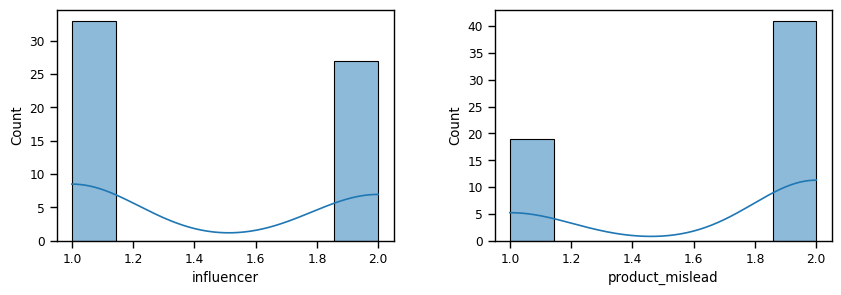

In [27]:
#| label: fig-outcome_variables_of_interest
#| fig-cap: "Histogram distributions of influencer impact grocery purchased (left) and if products have been misleading in the past (right)."
#| fig-num: true

fig, axes = plt.subplots(
    figsize=(10, 3), nrows=1, ncols=2)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

sns.histplot(
    data=df, x='influencer', 
    kde=True, ax=axes[0])

sns.histplot(
    data=df, x='product_mislead', 
    kde=True, ax=axes[1])

## Inspecting Variables
'influencer' is coded binary as 1 or 2. 1 is 'yes' to whether or not the participant is likely to purchase a food product because a influencer promotes it. It appears that there are more 'yes' responses than 'no'.
'product_mislead' is coded binary as 1 or 2. 1 is "yes" to whether or not a participant has been mislead by a products advertising. It appears 'no' is much higher for participants not being mislead as much as they are.

<Axes: xlabel='product_mislead', ylabel='food_researcher'>

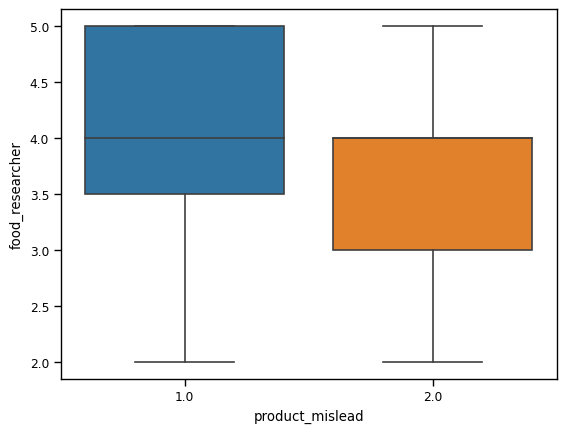

In [28]:
#| label: fig-apprehension-frequency-box
#| fig-cap: "Distributions of food researcher scores by perception of misleading product advertising."
#| fig-num: true
sns.boxplot(data=df, y='food_researcher', x='product_mislead')

<Axes: xlabel='influencer', ylabel='diet_tracker'>

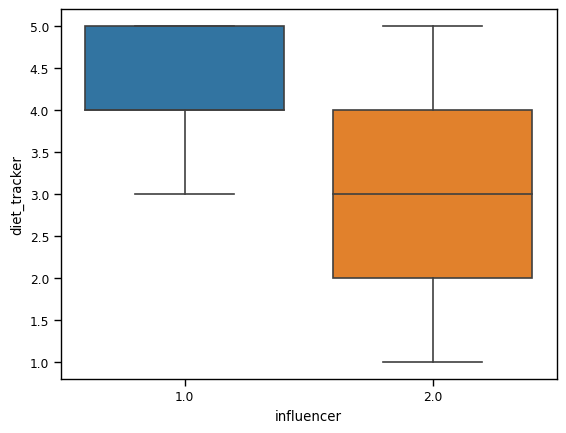

In [29]:
#| label: fig-influencer-frequency
#| fig-cap: "Frequency of responses to influencer impact to purchase."
#| fig-num: true

sns.boxplot(data=df, y='diet_tracker', x='influencer')

### Distribution Inspection
I chose to do a boxplot and a frequency plot for my two separate varaibles for different reasons. My boxplot was to show how those with higher rates of researching their food before buying comapred to if they have been mislead by a product before. 

I chose a frequency plot for influencer because I wanted to see how often those with 

### Correlation Heatmap

In the cell below, I created a heatmpa that shows the strength of correlations between teh survery numeric responses only. I did this because my research questions do not relate to any demographic data as well as any open-ended responses I have my in my survey. We can see that there are a couple moderately strong relationships, one noteable being the relationship between food researcher and someone who tracks their diet. Antoher with 'diet_tracker' and 'influencer'. 

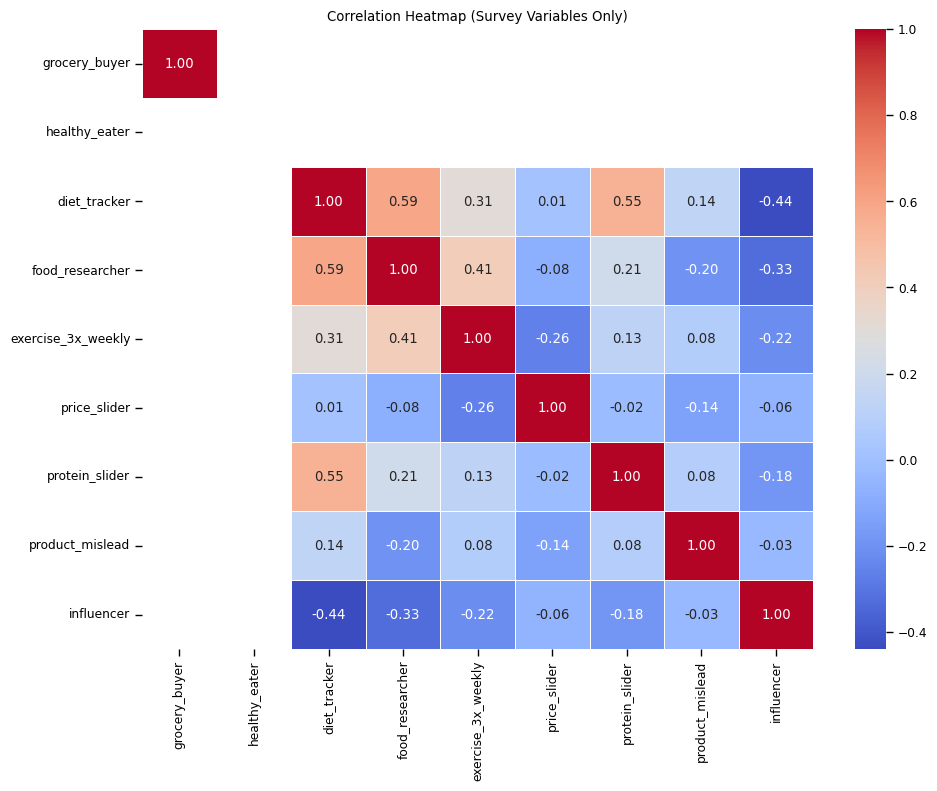

In [30]:
demo_columns = [
    'Submission id', 'Participant id', 'Age', 'Sex', 
    'Ethnicity simplified','Country of birth', 'Country of residence', 
    'Nationality', 'Language', 'Student status', 'Employment status'
]

survey_only_df = df.drop(columns=demo_columns, errors='ignore')


numeric_df = survey_only_df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Survey Variables Only)")
plt.tight_layout()
plt.show()

In [31]:
summary_stats = numeric_df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
grocery_buyer,61.0,1.016393,0.128037,1.0,1.00,1.0,1.00,2.0
healthy_eater,60.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
diet_tracker,60.0,3.683333,1.033206,1.0,3.00,4.0,4.00,5.0
food_researcher,60.0,3.716667,0.958312,2.0,3.00,4.0,4.00,5.0
exercise_3x_weekly,60.0,3.966667,1.088720,1.0,4.00,4.0,5.00,5.0
price_slider,60.0,62.266667,21.294438,14.0,50.00,61.0,80.25,100.0
protein_slider,60.0,55.983333,26.890545,0.0,39.75,58.5,75.25,100.0
product_mislead,60.0,1.683333,0.469102,1.0,1.00,2.0,2.00,2.0
influencer,60.0,1.450000,0.501692,1.0,1.00,1.0,2.00,2.0


# Data Analysis



In [32]:
binary_vars = [
    'grocery_buyer', 'healthy_eater', 'product_mislead', 
    'influencer'
]

df[binary_vars] = df[binary_vars].replace({2: -0.5, 1: 0.5})

df[binary_vars].sample(5)

,grocery_buyer,healthy_eater,product_mislead,influencer
45,0.5,0.5,-0.5,-0.5
56,0.5,0.5,-0.5,-0.5
36,0.5,0.5,0.5,0.5
37,0.5,0.5,-0.5,-0.5
0,-0.5,NaN,NaN,NaN


In [33]:
table = pd.crosstab(df['influencer'], df['diet_tracker'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 14.639563335215508
P-value: 0.005510247960120976


In [34]:
df['diet_group'] = pd.cut(
    df['diet_tracker'],
    bins=[0, 2, 5],   # 0 to 2 is low, 2 to 5 is high
    labels=['Low Diet Tracker', 'High Diet Tracker']
)

table = pd.crosstab(df['influencer'], df['diet_group'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")


print(pd.crosstab(df['influencer'], df['diet_group'], 
                  normalize='index'))

Chi2 Statistic: 10.458836733346537
P-value: 0.0012206412073847703
diet_group  Low Diet Tracker  High Diet Tracker
influencer                                     
-0.5                0.333333           0.666667
 0.5                0.000000           1.000000


In [35]:
table = pd.crosstab(df['product_mislead'], df['food_researcher'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 3.95316621760781
P-value: 0.266565943527787


# Results

We can see that there is a statistically significant relationship between 'influencer' and 'diet_tracker' with a p-value of 0.005. This means that someone's decision to buy a product is influenced by a social media influencer is also related to if they track their diet (on all 5 levels). To explore this further, I examined if this relationship differed by the group of 'diet_tracker', since it was a Likert scale with 5 different options. To do this, I created a two bins, one with a high end of dieting (2-5), and one with the low end of dieting (0-2). This result came up significant as well with the new p-value of .001. Based on these results, we will reject the null hyptohesis.

In additon, I created a crosstab table that showed the different groups that were making up the groups of being influenced or not. The results were quite shocking. Pariticpants who's decision to purchase a grocery store product was impacted by an inluencer was 100% of the time certian to be on the higher end of tracking their diet. We can see this in the figure below. These results are extremely strong, however this can be slilghty concerning as that is outrageous to have a group to be fully one group or the other. 

Based on these results, we can see that there is not a significant effect between those who are food researchers and if they are being misled by the products they bought. If there was a significant effect, I would then split the 'food_researcher' variable into two different groups, similarly to how I did with the group above. Since there is a non-significant result, the null is retained. 

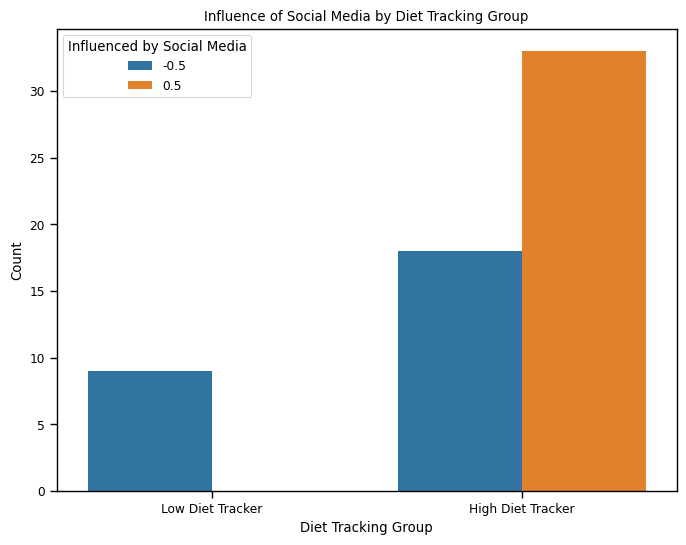

In [36]:
#| label: fig-influencer-group-diet-box-plot
#| fig-cap: "Frequency of responses to whether influencers impact purchasing decisions by diet tracking group."
#| fig-num: true

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='diet_group', hue='influencer')
plt.title('Influence of Social Media by Diet Tracking Group')
plt.xlabel('Diet Tracking Group')
plt.ylabel('Count')
plt.legend(title='Influenced by Social Media')
plt.show()

# Discussion

As noted above in the results seciton, there have been several different findings as a result of this analytical study. It is important to note that while the stastical significance of 'diet_tracker' and 'influencer' these results may be misleading. Having one group be entirely in one group over the other is cause for concern. These results may not be accurate and these may not be as strong as presented. This may be a result of the small sample size. This can be explored further with a larger sample, and more intensive questions about both influencers and diet tracking.

In addition, no statistical signifant findings were presented throughout the analysis to show a relationship between any group of 'food_researcher' and 'product_mislead'. This means that no matter how different the participant was from being all knowing of a product versus no knowing anything, they are equally mislead by the product. Now, this may seem bad, as it means that it does not matter how well you know a product, you are still going to be mislead. However, we can look at how underpowered we are in this instance to claim we will need to have this study reproduced. 

For both outcome variables, less than 80 participants is extremely low and hard to draw conclusions that are able to generalize to a whole population is very difficult and hard to accurately do. This can be fixed by more samples and more questions relating to the topics. This study did not focus on too many of the same topics, but did grab a lot of questions about different sections. 